# Final Project - The Rise and Fall of U.S. Inflation and Unemployment
<u>Author: Jiacheng Li \
Date: Dec. 22, 2021 \
Class:  ECON-GA 4002/4003 </u>

I sincerely thank Professor Tom Sargent for giving suggestions on the plan of this project and for providing really helpful feedback and guiding me to related sources. I also greatly thank Dr. Coleman and Dr. Lyon for their very helpful and inspiring suggestions, and for the all the useful knowledge and skills I have learned in both courses. This project has been a truly rewarding learning experience for me.

## Introduction

### Motivation
One big issue underpinning the current COVID-19 crisis is the rising price level and the possible “coming back” of high inflation. For the past few decades, the inflation rate in the US has been relatively stable and thus widely assumed to be "tamed", but it cannot be forgotten that there have been periods of inflation with very high volatility and persistence prior to the 1990s both in the United States and other advanced economies. Recently, both the Fed Chairman Jerome Powel and secretary of the Treasury Janet Yellen have made the comment to "retire" the word "transitory" to describe the current situation of inflation. In this context, it is both timely and useful to reflect upon the rise and fall of inflation in that not distant history, understand its dynamics and connections to historical events and policy interventions, and draw observations and possibly lessons from there. 

### Related Literature
The statistical inverse relationship between unemployment and wage inflation was first discovered by statistician A. W. Phillips Curve using the UK data in the sample period 1861–1957. In 1960, economists Paul Sammuelson and Robert Solow found the same relationship with the US data. They coined the term "Phillips Curve", and argued that it was possible to exploit it in government efforts to reduce unemployments at the cost of acceptable increase in inflation. However, in the late 60s and 70s, Miltron Friedman, Robert Lucas, Edmund Phelps, and others came forth with criticism of this view. They developed the theory of natural rate of unemployment and argue that the trade-off between unemployment and inflation is nothing but temporary, and the curve itself moves together with people's expectations. Ideas behind Lucas's famous Critique is deeply embeded in this view. This ground-breaking understanding later proves to be in line with the real data and is at the core of the explanations of both the rise of Great Inflation and the disinflation policy. 

One possible way to explain the acceleration of inflation in the 70s is that policy-makers want to exploit the Phillips Curve. They minimize inflation and unemployment under a quadratic scheme, in which the timing protocol is adopted such that policy-makers choose an inflation rate as the best response given the private sector, and this leads to convergence to consistent suboptimal (or Nash) equilibrium, as in Kydland and Prescott (1977)'s framework. However, to explain the disinflation process that later followed, there is no universal agreement, and Sargent (1999) examines two alternative narratives, the "the triumph of natural-rate theory " and the "vindication story", in his book "The Conquest of American Inflation". The first theory asserts that after the "break-downs" of exploitable Phillips relationship, policy-makers are later informed and influenced by the adapted natural rate view and changed their actions accordingly by promoting steady low inflation as their main objective. However, this narrative lacks explanatory power as to the absence of policy response even after the natural rate theory is well taught and assigned regime shifts to somewhat arbitrary exogenous changes in beliefs and policies. Sargent (1999) comes up and puts in favor an alternative view that sees this regime shift as an adaptive learning process from the government, where policy-makers, without knowing the true data-generating process, adhere to Samuelson-Solow's teaching based on traditional "perceived" Phillips Curves from the past data. It shows that policy-makers' position to pursue low inflation rate could emerge from this learning process.

### Project Plan
This project mainly investigates the posited statistical inverse relationship between inflation and unemployment and briefly explore the mechanism that explains the rise and fall of US inflation outlined above. It is organized as follows:
* First, I access alternative measures of price level and employment data for the US and construct inflation, unemployment rates, and unemployment gap that are used for further analysis. I then visualize these series and draw interesting observations and patterns over time.
* Next, I test the extent to which the statistical Phillips relationship holds true using simple linear regressions over different time windows. In particular, I extend the study under the framework of a NAIRU model to examine Friedman's postulations.
* Then, based on these observations, I make interpretations on how this observed Phillips relationship could explain the rise of Great Inflation in the 1970s, and how it is later tamed and stablized under Paul Volcker's historical efforts of disinflation. In making these interpretations, I adopt the two alternative narratives in Sargent (1999)'s framework, and invent simple numerical exercises to illustrate them or highlight possible methodology.
* Finally, I make a brief extension with the same analysis on the recent UK data.

In [1]:
"""
Author: Jiacheng Li
Created on Dec 1
Update: Aug 2 9:33 PM
"""

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
%matplotlib inline
from matplotlib.dates import DayLocator, MonthLocator, DateFormatter
from dateutil.relativedelta import relativedelta
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
import seaborn as sns

import requests
import json

# Part I. Data Report and Summary
## Data Access
This project mainly relies on the US (and potentially UK) price and unemployment data. Unemployment rate and related data are given by The Current Population Survey (CPS) data obtained from the US Bureau of Labor Statistics (BLS). I examine three alternative measures of inflation:
- Consumer Price Index (CPI), seasonally unadjusted, obtained from the US Bureau of Labor Statistics (BLS)
- Personal Consumption Expenditures Price Index (PCEPI), obtained from Bureau of Economic Analysis (BEA)
- Implicit GDP deflator by aggregate/types of products (BEA)

I will be accessing most datasets using their APIs.

One thing to notice is that BLS only allows data range up to 20 years per access.
Also, since most series do not have the same beginning and ending years, I will access series one at a time.

### CPI data
For CPI data, I will access CPI (core CPI) and Chained CPI, where the second takes into account substitution effects as result to a price change and adjust inflation downward.

This project potentially concerns the following data series:
- CPI-U, U.S. city average, All items - CUSR0000SA0
- CPI-U, U.S. city average, All items less food and energy - CUSR0000SA0L1E
- Chained CPI, All items - SUUR0000SA0
- Chained CPI, All items less food and energy - SUUR0000SA0L1E

#### Availability
- CUSR0000SA0: 1947 - 2022
- CUSR0000SA0L1E: 1957 - 2022     
- SUUR0000SA0: 1999 - 2022
- SUUR0000SA0L1E: 1999 - 2022

In [2]:
# BLS-CPI data info
series_ids_cpi = ['CUSR0000SA0', 'CUSR0000SA0L1E', 'SUUR0000SA0', 'SUUR0000SA0L1E']
start_year_cpi = [1947, 1957, 1999, 1999]

### Employment data
For employment data, this project is (potentially) interested in the following data series:

- Unemployment Rate: LNS14000000
- Labor Force Participation Rate: LNS11300000

I use the seasonally adjusted data for the two above series, and I include to the dataset the male/female-only rates to control for demographic changes since the time range of data I'm interested in starts relatively in the past. I retrieve both monthly and quarterly data.

#### Availability
- rates and levels: 1948 - 2022

In [3]:
# BLS-Employment data info
series_ids_em = ['LNS14000000', 'LNS11300000']

# to append male-only series and quarterly series
series_ids_em = (series_ids_em + [id[:-1] + '1' for id in series_ids_em] + [id[:-1] + '2' for id in series_ids_em])
series_ids_em = (series_ids_em + [id + 'Q' for id in series_ids_em])
start_year_em = 1948


In [4]:
def access_BLS_API(start_y, end_y, seriesid): 
    """
    The function accesses a given series for specified year range.

    Return: a list that contains all the requested data responses segmented by year range of max 20 years.
    """

    # API info
    BLS_key = '434f1b9e009a45eda7457208cb4eed23'       # '434f1b9e009a45eda7457208cb4eed23'
    BLS_headers = {'Content-type': 'application/json'}
    data = dict(seriesid = [seriesid], startyear= '', endyear = '', catalog = True, registrationkey = BLS_key)
    responses = []

    # access by 20 years that's the maximum range allowed by BLS API
    for i in range(start_y, end_y, 19):
        if i >= 2022 - 19:
            start_year, end_year = (i, 2022)
        else:
            start_year, end_year = (i, i+19)
        data['startyear'] = start_year
        data['endyear'] = end_year

        new_response = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=json.dumps(data), headers=BLS_headers).json()
        responses.append(new_response)
    return responses

# access cpi data
responses_cpi = []
for series_id, start_year in zip(series_ids_cpi, start_year_cpi):
    response = access_BLS_API(start_year, 2022, series_id)
    responses_cpi.append(response)

# access employment data
responses_em = []
for series_id in series_ids_em:
    response = access_BLS_API(start_year_em, 2022, series_id)
    responses_em.append(response)

### BEA data
The data is retreived from the National Income and Products Accounts (NIPA) obtained from Bureau of Economic Analysis (BEA) database. The series of our interest is 
- Price Indexes for Personal Consumption Expenditures by Major Type of Product, Monthly (M): T20804
- Implicit Price Deflators for Gross Domestic Product (A) (Q): T10109

The project is interested in the aggregate price levels and prices excluding food/energy i.e. core indexes.

#### Availability
- PCEPI: 1959 - 2022
- Implicit deflator: 1947 - 2022

This data is accessed through the BEA API.

In [5]:
# API parameters
BEA_key = '6824CA68-3933-423E-B1A8-FF86B4E45DB6'
get_param = 'GetData'
dataset_name = 'NIPA'
table_names = ['T20804', 'T10109']
freq, year = ['M', 'Q'], 'ALL'
format = 'JSON'

responses_BEA = []
for i in [0,1]:
    url = ('https://apps.bea.gov/api/data/?' +
        '&UserID={}&method={}&DataSetName={}&Tablename={}&Frequency={}&Year={}&ResultFormat={}'
        .format(BEA_key, get_param, dataset_name,table_names[i],freq[i],year,format)
    )
    responses_BEA.append(requests.get(url).json())

### CBO Data
Finally, I accessed a measure of <u> natural rate of unemployment </u> from the Congress Budget Office with quarterly data available from 1948 to 2020. Since they do not provide API access, I download the .cvs file and import it from the directory.

In [6]:
CBO_meta_df = pd.read_csv('Quarterly_Feb21.csv').set_index('date')
CBO_meta_df.index = pd.to_datetime(CBO_meta_df.index)
CBO_df = CBO_meta_df.loc[(CBO_meta_df.index <= '2022-7-31'), 'natural_unemployment_rate']

## Data Unpacking
The returned BLS responses have the following structure:

- `responses_data[i]` contains all responses for one series
- `responses_data[i][j]` contains every year range of the series
- `responses_data[i][j]` has the main data stored in `'Results'`
- I will keep `series_id`, `series_title` and `survey_abbreviation`  in `catalog` information, and unpack `data`.

The returned BEA responses have the following structure:

- `responses_PCE[1]['BEAAPI']['Results']['Data']` where we can get the main data.


In [7]:
def BLS_series_unpack(response):
    """
    Input: response of a particular series
    Return: a dataframe that contains that series
    """
    series_info = response[0]['Results']["series"][0]

    # unpack
    series_id = series_info['seriesID']
    series_title = series_info['catalog']['series_title']
    survey = series_info['catalog']['survey_abbreviation']

    data = pd.DataFrame({})
    for sub_response in response:
        new_data = pd.DataFrame(sub_response['Results']["series"][0]["data"]).assign(series_id=series_id, series_title=series_title, survey=survey)
        data = pd.concat([data, new_data])
    
    return data

def BEA_series_unpack(response, index):
    """
    Get main data for PCE series from API response
    """
    return pd.DataFrame(response[index]['BEAAPI']['Results']['Data'])

In [8]:
# unpack BLS data
BLS_data = []
for response in (responses_cpi + responses_em):
    BLS_data.append(BLS_series_unpack(response))

# unpack BEA data
BEA_data = []
for i in [0,1]:
    BEA_data.append(BEA_series_unpack(responses_BEA, i))

## Data Processing
In this section, I construct two Dataframes, with one that contains quarterly series and the other containing monthly series, so that each of the above series is easy to operate on.

### Restructure data
- Here, I keep only the level variable for each series, constructing an identifier called `series_names` that identifies each series, and put them into two dataframes depending on whether a series is monthly data or quarterly data.
- I put time indexes to pd.datetime format for convenient time series analysis.

In [9]:
raw_data = {'BLS': BLS_data, 'BEA': BEA_data}

quarterly_data = pd.DataFrame({})
monthly_data = pd.DataFrame({})

# restructure BLS data
BLS_series_names = {
    'CUSR0000SA0': 'CPI',           'CUSR0000SA0L1E': 'core_CPI', 
    'SUUR0000SA0': 'CPI_chained',   'SUUR0000SA0L1E': 'core_CPI_chained',
    'LNS14000000': 'unemp_rate',    'LNS14000001': 'unemp_rate_M',      'LNS14000002': 'unemp_rate_F', 
    'LNS14000000Q': 'unemp_rate_Q', 'LNS14000001Q': 'unemp_rate_M_Q',   'LNS14000002Q': 'unemp_rate_F_Q', 
    'LNS11300000': 'LFP_rate',      'LNS11300001': 'LFP_rate_M',        'LNS11300002': 'LFP_rate_F',
    'LNS11300000Q': 'LFP_rate_Q',   'LNS11300001Q': 'LFP_rate_M_Q',     'LNS11300002Q': 'LFP_rate_F_Q'
    }
col_list = ['year', 'period', 'value']


for series in BLS_data:
    s_id = series['series_id'].iloc[0]
    new_series = series[col_list].assign(series_name = BLS_series_names[s_id])
    if 'Q' in s_id:
        quarterly_data = pd.concat([quarterly_data, new_series])
    else:
        monthly_data = pd.concat([monthly_data, new_series])

# to datetime
qs = quarterly_data['year'] + '-' + quarterly_data['period'].str.replace('0', '')
quarterly_data['date'] = pd.PeriodIndex(qs, freq='Q').to_timestamp()
quarterly_data = quarterly_data.drop(columns=['year', 'period'])

monthly_data['date'] = pd.to_datetime(monthly_data.year + monthly_data.period.str.replace('M', '-'))
monthly_data = monthly_data.drop(columns=['year', 'period'])


# restructure BEA data
col_rename = {'DataValue': 'value'}

# PCE and core PCE
pce = BEA_data[0].loc[BEA_data[0].LineNumber.isin(['1', '6']), ['LineNumber', 'TimePeriod', 'DataValue']]
pce.loc[pce.LineNumber == '1', 'series_name'] = 'PCE'
pce.loc[pce.LineNumber == '6', 'series_name'] = 'core_PCE'
pce['date'] = pd.to_datetime(pce.TimePeriod.str.replace('M', '-'))
pce = pce.drop(['TimePeriod', 'LineNumber'], axis=1).rename(columns=col_rename)

# GDP deflator
gdp_deflator = BEA_data[1].loc[BEA_data[1].LineNumber == '1', ['TimePeriod', 'DataValue']].assign(series_name = 'GDP_deflator_Q')
gdp_deflator['date'] = pd.PeriodIndex(gdp_deflator['TimePeriod'], freq='Q').to_timestamp()
gdp_deflator = gdp_deflator.drop(['TimePeriod'], axis=1).rename(columns=col_rename)

quarterly_data = pd.concat([quarterly_data, gdp_deflator])
monthly_data = pd.concat([monthly_data, pce])

# save data
quarterly_data.to_csv("quarterly_data.csv")
monthly_data.to_csv("monthly_data.csv")

I put some further manipulation of data:
- converting string values to numeric;
- make pivot tables for easier manipulation;
- calculate year-end monthly inflation rates, i.e., the <u>12-month change in price indexes</u> for each of the price index;
- calculate year-end quarterly inflation rates by first averaging price indexes over quarters and year-end changes;
- add CBO natural rate of unemployment data to the quarterly pivot table;
- store datasets.

In [10]:
quarterly_data = pd.read_csv('quarterly_data.csv')
monthly_data = pd.read_csv('monthly_data.csv')

# convert to numeric values
quarterly_data['value'] = quarterly_data['value'].apply(pd.to_numeric)
monthly_data['value'] = monthly_data['value'].apply(pd.to_numeric)

# make pivot tables
monthly_data = monthly_data.pivot_table(
            index="date",
            columns="series_name",
            values="value")
            
quarterly_data = quarterly_data.pivot_table(
            index="date",
            columns="series_name",
            values="value")

monthly_data.index = pd.to_datetime(monthly_data.index)
quarterly_data.index = pd.to_datetime(quarterly_data.index)

price_indexes = ['CPI', 'core_CPI', 'CPI_chained', 'core_CPI_chained', 'PCE', 'core_PCE']

# monthly inflation
price_data = monthly_data.loc[:,price_indexes]
monthly_data[
    [item + '_inflation' for item in price_indexes]
    ] = (price_data - price_data.shift(12)) / price_data.shift(12) * 100 

# quarterly inflation
price_data_Q_avg = price_data.groupby(pd.PeriodIndex(price_data.index, freq='Q'), axis=0).agg(['mean'])
price_data_Q_avg.index = price_data_Q_avg.index.to_timestamp()
quarterly_data[
    [item + '_Q_inflation' for item in price_indexes]
    ] = (price_data_Q_avg - price_data_Q_avg.shift(4)) / price_data_Q_avg.shift(4) * 100
quarterly_data

quarterly_data['GDP_deflator_Q_inflation'] = (
    quarterly_data['GDP_deflator_Q'] - quarterly_data['GDP_deflator_Q'].shift(4)
    ) / quarterly_data['GDP_deflator_Q'].shift(4) * 100

# natural rate of unemployment and unemployment gap
quarterly_data['natural_unemp_Q'] = CBO_df
quarterly_data['unemp_gap_Q'] = quarterly_data['unemp_rate_Q'] - quarterly_data['natural_unemp_Q']

## Data Summary
This section presents a preliminery summary of the acquired data series using plots. It includes
- the evolution of inflation rates measured by alternative price indexes;
- the evolution of LFP and unemployment with aggregate and gender-specific data;
- US inflation in conjunction with unemployment rate.

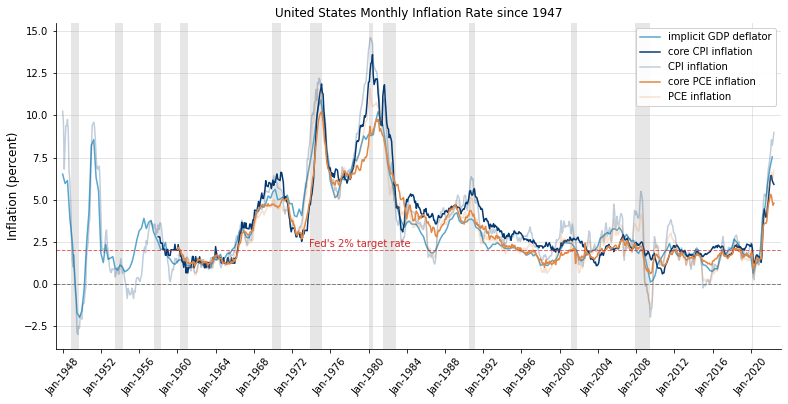

In [11]:
# plt.rcParams['figure.dpi'] = 200
# plt.rcParams['savefig.dpi'] = 00
colors = ['#57a7cc', '#063970', '#e28743', '#D22B2B', '#C34A36']
plt.style.use('seaborn-bright')

def shade_recessions(ax):
    recessions = pd.DataFrame({
        'start': ['1948-11-01', '1953-07-01', '1957-08-01', '1960-04-01', '1969-12-01', '1973-11-01', '1980-01-01', 
        '1981-07-01', '1990-07-01', '2001-03-01', '2007-12-01', '2020-02-01'],
        'end': ['1949-10-01', '1954-05-01', '1958-04-01', '1961-02-01', '1970-11-01', '1975-03-01', '1980-07-01', 
        '1982-11-01', '1991-03-01', '2001-11-01', '2009-06-01', '2020-04-01']
    })
    for col in recessions.columns:
        recessions[col] = pd.to_datetime(recessions[col])
    for id, row in recessions.iterrows():
        ax.axvspan(row['start'], row['end'], color='#333333', alpha=.12, ec=None, label =  "_" * id + "interval")

# inflation
CPI_cols = ['core_CPI_inflation', 'CPI_inflation']
PCE_cols = ['core_PCE_inflation', 'PCE_inflation']
alpha = [1, 0.25]

fig, ax = plt.subplots(figsize=(13, 6))

ax.margins(x=0.01)
ax.plot(quarterly_data['GDP_deflator_Q_inflation'], color = colors[0], lw=1.5)
for col, al in zip(CPI_cols, alpha):
    ax.plot(monthly_data[col], color = colors[1], alpha=al, lw=1.5)
for col, al in zip(PCE_cols, alpha):
    ax.plot(monthly_data[col], color = colors[2], alpha=al, lw=1.5)
shade_recessions(ax)

ax.axhline(y=0, color='tab:gray', linestyle='--', lw=1)
ax.axhline(y=2, color=colors[3], linestyle='--', lw=1, alpha=0.7)
ax.text(dt.date(1973, 10, 1), 2.2, "Fed's 2% target rate", color=colors[3])
ax.legend(['implicit GDP deflator', 'core CPI inflation', 'CPI inflation', 'core PCE inflation', 'PCE inflation'], 
    loc='upper right', frameon=True, framealpha=0.9, fontsize='medium')

ax.set_title('United States Monthly Inflation Rate since 1947', size='large')
#ax.set_xlabel('Date', size='large')
ax.set_ylabel('Inflation (percent)', size='large')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.4)
ax.xaxis.set_major_locator(mdates.YearLocator(4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.tick_params(axis="x", labelrotation= 50)

plt.show()

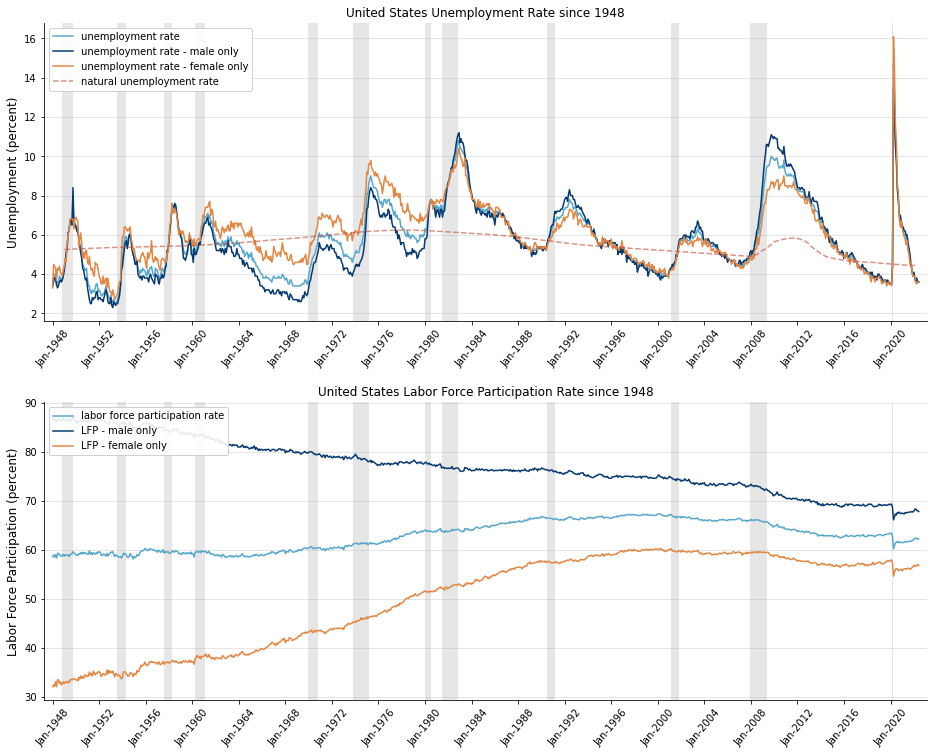

In [12]:
# unemployment rate
fig, ax = plt.subplots(2, 1, figsize=(13, 10))
fig.tight_layout(h_pad=6)

ax[0].plot(monthly_data['unemp_rate'], color = colors[0], lw=1.5)
ax[0].plot(monthly_data['unemp_rate_M'], color = colors[1], lw=1.5)
ax[0].plot(monthly_data['unemp_rate_F'], color = colors[2], lw=1.5)
ax[0].plot(quarterly_data['natural_unemp_Q'], color = colors[4], lw=1.5, alpha=0.6, ls='--')
ax[0].set_title('United States Unemployment Rate since 1948', size='large')
#ax[0].set_xlabel('Date', size='large')
ax[0].set_ylabel('Unemployment (percent)', size='large')
ax[0].legend(['unemployment rate', 'unemployment rate - male only', 'unemployment rate - female only', 'natural unemployment rate'],
    loc='upper left', frameon=True, framealpha=0.9, fontsize='medium')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].grid(axis='y', alpha=0.4)

# LFP
ax[1].plot(monthly_data['LFP_rate'], color = colors[0], lw=1.5)
ax[1].plot(monthly_data['LFP_rate_M'], color = colors[1], lw=1.5)
ax[1].plot(monthly_data['LFP_rate_F'], color = colors[2], lw=1.5)
ax[1].set_title('United States Labor Force Participation Rate since 1948', size='large')
#ax[1].set_xlabel('Date', size='large')
ax[1].set_ylabel('Labor Force Participation (percent)', size='large')
ax[1].legend(['labor force participation rate', 'LFP - male only', 'LFP - female only'],
    loc='upper left', frameon=True, framealpha=0.9, fontsize='medium')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].grid(axis='y', alpha=0.4)

for i in [0,1]:
    ax[i].margins(x=0.01)
    ax[i].xaxis.set_major_locator(mdates.YearLocator(4))
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
    ax[i].tick_params(axis="x", labelrotation= 50)
    shade_recessions(ax[i])

plt.show()

One interesting observation from the above figures is that while it's obvious that LFP rate of both sexes converge over time, the unemployment gap between sexes also seem to decline over time. While it looks a natural trend that the female participation into the labor force increases over time due to the increasingly recognized important role of women in the workplace and gender equality movement, the pattern that male LFP declines and converges downward over time is an interesting one. Moreover, it appears that male unemployment rate used to be less volatile than female unemployment, while starting in the 1980s, this pattern seems to be reversed. 

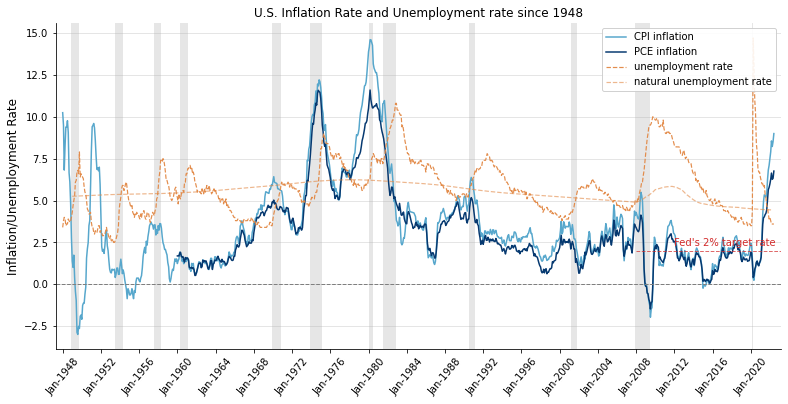

In [13]:
# inflation and unemployment
fig, ax = plt.subplots(figsize=(13, 6))

ax.margins(x=0.01)
ax.plot(monthly_data['CPI_inflation'], color = colors[0], lw=1.5)
ax.plot(monthly_data['PCE_inflation'], color = colors[1], lw=1.5)
ax.plot(monthly_data['unemp_rate'], color = colors[2], alpha=0.95, lw=1.2,  ls='--')
ax.plot(quarterly_data['natural_unemp_Q'], color = colors[2], lw=1.2, alpha=0.6, ls='--')
shade_recessions(ax)

ax.axhline(y=0, color='tab:gray', linestyle='--', lw=1)
ax.legend(['CPI inflation', 'PCE inflation', 'unemployment rate', 'natural unemployment rate'], 
    loc='upper right', frameon=True, framealpha=0.9, fontsize='medium')

ax.set_title('U.S. Inflation Rate and Unemployment rate since 1948', size='large')
#ax.set_xlabel('Date', size='large')
ax.set_ylabel('Inflation/Unemployment Rate', size='large')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.4)

ax.axhline(y=2, color=colors[3], linestyle='--', lw=1, alpha=0.7, xmin=0.8)
ax.text(dt.date(2012, 1, 1), 2.3, "Fed's 2% target rate", color=colors[3])

ax.xaxis.set_major_locator(mdates.YearLocator(4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.tick_params(axis="x", labelrotation= 50)

plt.show()

From the above presentation of inflation and unemployment series, we can see that there seems to be an inverse relationship between unemployment and inflation, as higher inflation seems often associated with lower unemployment. This relationship especially holds true in the immediate post-WWII era as taught by Sameulson and Solow. 

In December 1967, Milton Friedman delivered his Presidential address to the American Economic Association. In that address, Friedman warned that an inverse relationship between inflation and unemployment was at best "temporary" and therefore could not be exploited permanently. Instead, he posited that there was a natural rate of unemployment, which was later developed by Phelps and others, and that higher inflation could induce at most a "short-run" decrease in unemployment that would evaporate in the "long run".

As we can see from the above graph, Milton Friedman was prophetically right. In the early 70s, there was a huge acceleration in both inflation and unemployment by all measures. Inflation was not only higher but also more volatile, and this phenomenon was persistent until the late 70s. In December 1976, Friedman delivered his Nobel prize lecture. In that lecture, he stated his guess that persistently <u>higher</u> inflation might actually lead to persistently <u>higher</u> unemployment. This implies a positive relationship between unemployment and inflation. But he noted that this is unlikely to last long, as political and institutional arrangements would either adjust or the government would adopt policies that will produce a low rate of inflation and less government intervention into the fixing of prices. Just as he has predicted, the periods of high inflation finally ended abruptly when Paul Volcker, the 12th Chairman of the Federal Reserve, led an unprecedentedly determined stance to cure inflation. And at a cost of reaching a 11 percent unemployment rate during the 1982 and 1983 recession, inflation finally stablized.

To study a possibly evolving inflation-unemployment statistical relationship in light of these events and flucutations, I will more closely examine whether a negative relationship holds true and how it evolves in both directions by running regressions across different time windows below.

### The NAIRU model

Next, I examine the development of change in inflations and unemployment gap in light of a NAIRU model setting. According to a NAIRU model, the Phillips curve can be described as 
$$ \pi_t = \pi_t^e - \theta (U_t - U_t^*)$$
where $\pi_t$ is the inflation rate at time $t$, $\pi_t^e$ denotes the expectation of inflation, $U_t$ denotes the unemployment rate at time $t$, and $U_t^*$ is the natural rate of unemployment.

The spirit of a basic NAIRU model consists of the fact that firms and workers make contract on wages based on their expectation of inflation in future periods, while firms as price takers set employment level based on the realized real wages. An unexpected price inflation leads to lower real wages and firms expand employment level as a response, this leads to decreases in unemployment.

Adopting a simple adaptive expectation arrangement, we can replace $\pi_t^e$ with $\pi_{t-1}$, that is, agents form expectation of inflation at time $t$ based on the realized inflation of the last period. Note that this specification can also be replaced by a weighted sum on lagged inflation. The rational expectation assumption imposes $\pi_t = \pi_t^e$, which leads to $U_t - U_t^*$. This leads to the defined natural rate of unemployment.

Under the NAIRU framework with adaptive expectations, we have:
$$ \pi_t - \pi_t^e = \pi_t - \pi_{t-1} = \Delta \pi = - \theta (U_t - U_t^*)$$

This implies a negative relationship between growth in inflation and unemployment gap. Using the estimated natural rate of unemployment reported by the US Congress Budget Office (CBO) and subtracting it from the actual unemployment rate, we have the following series of unemployment gap.

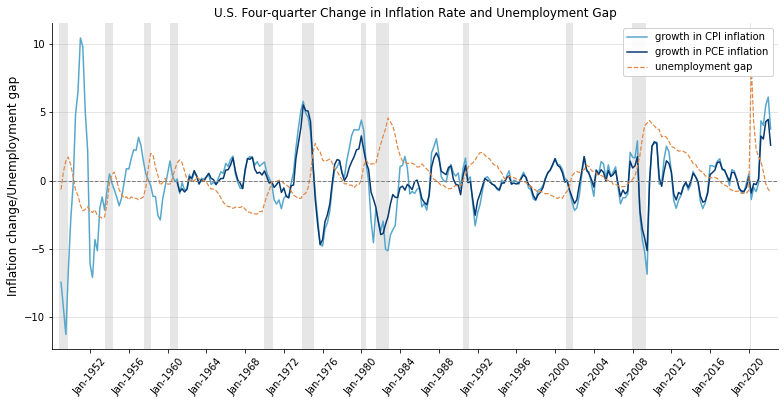

In [14]:
# inflation and unemployment gap
fig, ax = plt.subplots(figsize=(13, 6))

ax.margins(x=0.01)
ax.plot(quarterly_data['CPI_Q_inflation'] - quarterly_data['CPI_Q_inflation'].shift(4), color = colors[0], lw=1.5)
ax.plot(quarterly_data['PCE_Q_inflation'] - quarterly_data['PCE_Q_inflation'].shift(4), color = colors[1], lw=1.5)
ax.plot(quarterly_data['unemp_gap_Q'], color = colors[2], lw=1.2, ls='--')
shade_recessions(ax)

ax.axhline(y=0, color='tab:gray', linestyle='--', lw=1)
ax.legend(['growth in CPI inflation', 'growth in PCE inflation', 'unemployment gap'], 
    loc='upper right', frameon=True, framealpha=0.9, fontsize='medium')

ax.set_title('U.S. Four-quarter Change in Inflation Rate and Unemployment Gap', size='large')
ax.set_ylabel('Inflation change/Unemployment gap', size='large')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.4)

ax.xaxis.set_major_locator(mdates.YearLocator(4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.tick_params(axis="x", labelrotation= 50)

plt.show()

The above graph displays a visibly seen negative relationship between inflation change (estimated unexpected inflation) and unemployment gap, as predicted by the NAIRU model. This will be tested using linear regressions in the below analysis.

# Part II. Analysis
### Mimic Acceleration of Inflation in a simple Kydland-Prescott Framework

The first step is to understand the quick acceleration of inflation in the early 1970s, as reflected in the above graph of inflation series. We have also seen a break-down of Phillips Curve. In their famous discussion of time-inconsistent government policy, Kydland and Prescott gives a one-period example of inflation-unemployment dynamics that could possibly explain the convergence of inflation to a suboptimal consistent equilibrium of higher inflation rates.

Consider the one-period economy in which inflation and unemployment evolves according to the NAIRU model dynamics. Government wants to minimize both inflation and unemployment subject to the constraint imposed by the Phillips relationship, i.e., it solves the below one-period quadratic minimization problem:
$$
\begin{aligned}
\min_{\pi} &	-.5\left(U^{2}+\pi^{2}\right) \\
\text{s.t. }\; &	U=U^{*}-\theta\left(\pi-\pi^{e}\right),\;\theta>0
\end{aligned}
$$
After substitution, this is equivalent to 
$$ \min_{\pi}	-.5\left((U^{*}-\theta\left(\pi-\pi^{e}\right))^{2}+\pi^{2}\right) $$

We adopt the following timing protocal: given the public's expectation $\pi^e$, the government follows a decision rule $g(\pi^e)$ that solves the above quadratic problem. First-order condition yields the solution:

$$\pi = g(\pi^e) = \frac{\theta}{\theta^{2}+1}U^{*}+\frac{\theta^{2}}{\theta^{2}+1}\pi^{e}$$

Adopting the basic adaptive expectation scheme by setting $\pi^e = \pi_{t-1}$, and adding a transitory shock $z \sim N(0,0.01)$ to the government response, we arrive at a law of motion for inflation:
$$\pi_{t} = \frac{\theta}{\theta^{2}+1}U^{*}+\frac{\theta^{2}}{\theta^{2}+1}\pi_{t-1} + z$$ 

The shock that we add above reflects the fact that monetary authority does not have full control over the realized level of inflation. Thus, we can provide a simple calibration and simulation of this result. Let the natural rate of unemployment $U^* = 0.06$, set initial rate of inflation at the post-war level of 2%, and choose the slope parameter $\theta = 2$. The following figure crudely mimics the post-war dynamics of acceleration in inflation rates as convergence to the Kydland-Prescott suboptimal equilibrium.

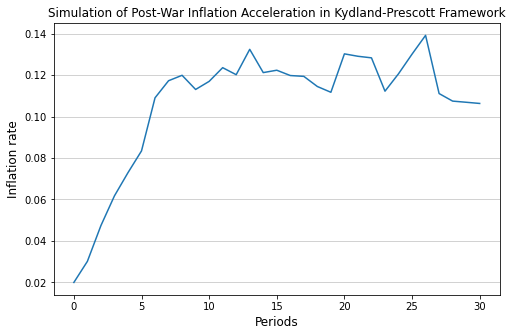

In [15]:
# parameters
theta = 2
Un = .06
x0 = 0.02
T = 30

# optimal policy response
g_x = lambda x: (theta)/(theta**2+1) * Un + (theta**2)/(theta**2+1) * x

# simulation
x_hist = [x0]
y_hist = []
for t in range(T):
    x = x_hist[t]
    y = g_x(x) + np.random.normal(0,0.01)
    y_hist.append(y)
    x_hist.append(y)

fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.plot(x_hist, color='tab:blue')
ax.set_title('Simulation of Post-War Inflation Acceleration in Kydland-Prescott Framework', size='large')
ax.set_ylabel('Inflation rate', size='large')
ax.set_xlabel('Periods', size='large')
ax.grid(axis='y', alpha=0.7)

plt.show()

One thing to highlight regarding this result is that once the inflation reaches the suboptimal excessive level, it enters a stationary point with random fluctuations and by itself could not explain the fall of US inflation as happened in history. The dynamic version of the above problem may face multiple equilibria. In fact, even with a learning model where government approximates the statistical Phillips curve from previous experiences, as Sargent 1999 and Sargent et al. 2006 demonstrate, as long as it were to believe that the coefficients of its Phillips curve were constant over time, the estimates would still converge to ones that support a self-confirming equilibrium.


### Statistical Inflation-Unemployment Relationship
Next, I would like to recover the statistical "Phillips Curve", or the supposedly inverse relationship between inflation and unemployment using Ordinary Least-square linear regression.

I will use the `statsmodels.api` functionality to solve this program.

#### Directions of fit

One potential question here is regarding the direction of regression - we could either regress unemployment on inflation or inflation on unemployment. In their investigation into the Post-War Phillips Curves, King and Watson (1994) specifies two alternative identifications - the traditional Keynesian identification, which makes the business cycle respond to demand shocks and the direction of fit should be inflation on unemployment, and the "monetarist" or Classical econometric model, under which unemployment moves in response to inflation so we should regress unemployment on inflation. Notice that this problem is especially important since when the government solves the quadratic minimization problem on inflation and unemployment, or the "Phelps problem", to determine optimal inflation, the direction of minimization depending on government beliefs really affects outcomes.

Since for this crude analysis there is no full specification of a model, to explore the statistical relationship, I shall adopt regressions on both directions and thus avoid taking a stand on which is the "independent" variable. I will plot them on the same graph.

In [16]:
def get_sample(DF: pd.DataFrame, series_1: str, series_2: str, begin_date: str, end_date: str):
    """
    Input: 
        DF:                                 the Dataframe where series to be extrated from,
        names of series 1, 2, 3:            series to be retrieved
    Return: 
        series 1, 2, 3
    """
    begin_date, end_date = pd.to_datetime(begin_date), pd.to_datetime(end_date)
    sample = DF.loc[(DF.index > begin_date) & (DF.index <= end_date)]

    return sample[series_1], sample[series_2]

def Phillips_OLS(infl, unemp, xy=1):
    """
    Input: 
        infl, unemp:    series to conduct regression from
        xy:         if xy = 1, regress infl on unemp; else, regress unemp on infl
    Return: 
        OLS regression results as a statsmodel object
    """
    if xy==1:
        indep, dep = unemp, infl
    else:
        indep, dep = infl, unemp
    # OLS
    n = indep.size
    A2 = np.array(indep).reshape(n,1)
    b = np.array(dep)
    A = np.hstack((np.ones([n,1]), A2))
    res = sm.OLS(endog=b, exog=A, missing='drop')
    corr = np.corrcoef(indep, dep)[0,1]
    return res, corr


To recover the Phillips relationship, I will regress between unemployment rate and inflation for different year window arrangements. Specifically, I will arrange and report LS regressions according to:
- a cumulative window with an increment of 5 years each time since earliest available inflation data;
- 5-year rolling windows since earliest data till the latest date.

I make the cumulative plot to validate Milton Friedman's claim that the unemployment-inflation trade-off is at best a temporary phenomenon and evaporates in the long run. I adopt the two timing window arrangements to examine the short-run and long-run patterns respectively.

I set date range to (`1948-12-31`, `2022-05-01`), which include the earliest and latest inflation data in our dataset. To avoid too large volatility, I base this analysis on <u> quarterly inflation and unemployment </u> data.

I first create two functions that can be called to create and plot cumulative and rolling windows given a dataset respectively.

In [17]:
def create_windows(begin_date:str, end_date: str, cumulative: int, freq: int):
    """
    create year windows
    Return: a list of tuples that contain start_date and end_date
    """
    date_range = pd.date_range(begin_date, end_date, freq="Y")[::freq]
    windows = []
    for i in date_range:
        if i.year >= 2022-freq+1:
            end = pd.to_datetime(end_date)
        else: 
            end = i + relativedelta(years=freq)
        if cumulative == 1:
            windows.append((date_range[0], end))
        else:
            windows.append((i, end))
    return windows

def plot_cum_windows(windows, data, inflation, unemployment ,title, xy=1, xlim=[0,16], ylim=[-4,16], figsize=[12,12]):
    """
    regress inflation on unemployment if xy = 1, else, unemployment on inflation
    """
    # cumulative window plot
    rows, last_row = divmod(len(windows), 3)
    if last_row == 0:
        fig, ax = plt.subplots(rows, 3, figsize=figsize)
    else: 
        fig, ax = plt.subplots(rows+1, 3, figsize=figsize)
    
    plt.style.use('seaborn-bright')  # ggplot
    fig.tight_layout(h_pad=1, rect=[0, 0, 1, 0.96])
    fig.suptitle(title, fontsize=16)

    if xy == 'both':
        xys = [0,1]
    else: xys = [xy]

    for i, win in enumerate(windows):
        col, row = divmod(i, 3)

        for xy in xys:
            infl, unemp = get_sample(data, inflation, unemployment, win[0], win[1])    
            res, corr = Phillips_OLS(infl, unemp, xy)
            coef = res.fit().params
            ax[col, row].scatter(unemp, infl, s=3, c=colors[0])
            ax[col, row].text(10, 10, 'corr = ' + str(round(corr, 3)), size='medium')
        
            # reg line
            if xy==1:
                x = np.linspace(0, 20, 500)                 # unemp
                y = coef[0] + coef[1] * x                                                 # infl
            else: 
                y = np.linspace(-5, 30, 500)                 # unemp
                x = coef[0] + coef[1] * y                                                 # infl
            ax[col, row].plot(x,y, c=colors[3])
        
        ax[col, row].set_ylabel(str(win[0].year + 1) + ' - ' + str(win[1].year))
        ax[col, row].spines['top'].set_visible(False)
        ax[col, row].spines['right'].set_visible(False)
        ax[col, row].set_xlabel('Unemployment')
        ax[col, row].grid(alpha=0.2)
        
        ax[col, row].set_ylim(ylim)
        ax[col, row].set_xlim(xlim)

    if last_row != 0:
        fig.delaxes(ax[rows][2-last_row])     # 3 - modulo - 1
        fig.delaxes(ax[rows][3-last_row])     # 3 - modulo -2
    plt.show()


def plot_rol_windows(windows, data, inflations, unemployment ,title, legend, xy=1, xlim=[0,16], ylim=[-4,16], figsize=[12,12]):
    """
    regress inflation on unemployment if xy = 1, else, unemployment on inflation
    """

    alphas = [1, 1,1]
    colors2 = ['#063970', '#57a7cc', '#e28743', '#954B00', '#004F6E']

    rows, last_row = divmod(len(windows), 3)
    if last_row == 0:
        fig, ax = plt.subplots(rows, 3, figsize=figsize)
    else: 
        fig, ax = plt.subplots(rows+1, 3, figsize=figsize)
    
    fig.tight_layout(h_pad=1, rect=[0, 0, 1, 0.96])
    fig.suptitle(title, fontsize=16)

    # plot both lines
    if xy == 'both':
        xys = [0,1]
    else: xys = [xy]

    for i, win in enumerate(windows):
        col, row = divmod(i, 3)

        for xy_i in xys:
            # if both, change the alphas for the second set of regression lines
            if (xy == 'both') & (xy_i == 1):
                alphas2 = [item - 0.7 for item in alphas]
            else: 
                alphas2 = alphas

            for j, infl in enumerate(inflations):
                infl, unemp = get_sample(data, infl, unemployment, win[0], win[1])
                if not infl.isna().values.any():                # check availability
                    res, corr = Phillips_OLS(infl, unemp, xy_i)
                    coef = res.fit().params
                    ax[col, row].scatter(unemp, infl, s=3, c=colors2[j], alpha=alphas2[j])
                    if j ==0:
                        ax[col, row].set_xlabel('corr = ' + str(round(corr, 3)) + ' (CPI)', size='medium')

                    # reg line
                    if xy_i==1:
                        x = np.linspace(0, 20, 500)                 # unemp
                        y = coef[0] + coef[1] * x                                                 # infl
                    else: 
                        y = np.linspace(-5, 30, 500)                 # unemp
                        x = coef[0] + coef[1] * y                                                 # infl
                    ax[col, row].plot(x,y, c=colors2[j], alpha=alphas2[j])

                if (col,row) == (4,2):
                    ax[col, row].legend(legend, framealpha=0.5)

        ax[col, row].set_ylim(ylim)
        ax[col, row].set_xlim(xlim)
        ax[col, row].set_ylabel(str(win[0].year + 1) + ' - ' + str(win[1].year))
        ax[col, row].spines['top'].set_visible(False)
        ax[col, row].spines['right'].set_visible(False)
        ax[col, row].grid(alpha=0.2)
            
    if last_row != 0:
        fig.delaxes(ax[rows][2-last_row])     # 3 - modulo - 1
        fig.delaxes(ax[rows][3-last_row])     # 3 - modulo -2
    plt.show()


The first figure below plots the regression of US CPI inflation on male unemployment over cumulative 5-year windows; the second figure plots the regression in the reversed direction.

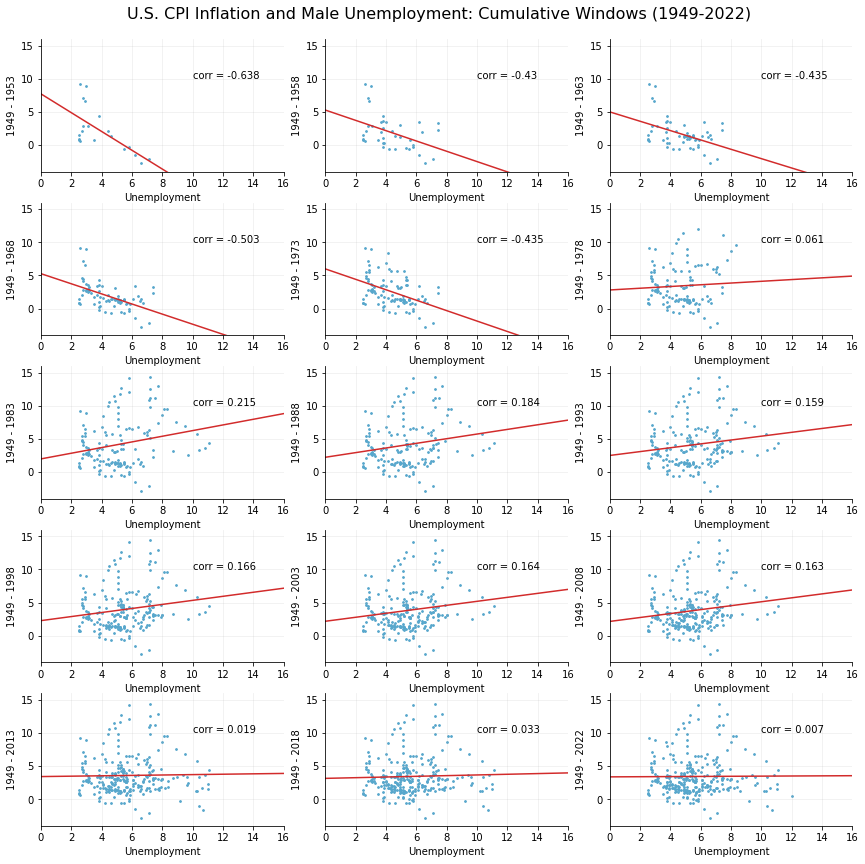

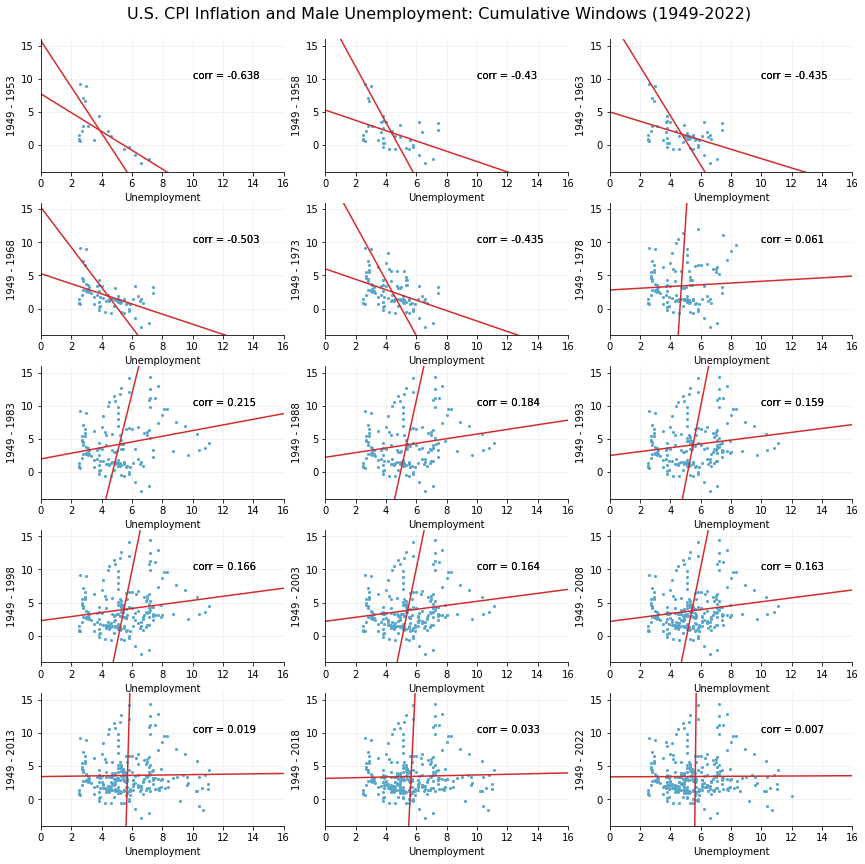

In [18]:
# plot cumulative windows
cum_windows = create_windows("1948-12-31", "2022-05-01", cumulative=1, freq=5)
rol_windows = create_windows("1948-12-31", "2022-05-01", cumulative=0, freq=5)

title = "U.S. CPI Inflation and Male Unemployment: Cumulative Windows (1949-2022)"
inflation, unemployment = 'CPI_Q_inflation', 'unemp_rate_M_Q'

# two directions
plot_cum_windows(cum_windows, quarterly_data, inflation, unemployment ,title, xy=1)
plot_cum_windows(cum_windows, quarterly_data, inflation, unemployment ,title, xy='both')

Indeed, we can see very clearly that initially there exists a short-run trade-off (negative relationship) between inflation and unemployment under both directions of fit, but as the window increments with more data, the Phillips Curve dies down and eventually disappears. The correlation coefficient between the two variables is growing smaller as a general pattern. Friedman's prediction is indeed true.

Next, I plot the same two regressions over 5-year rolling windows.

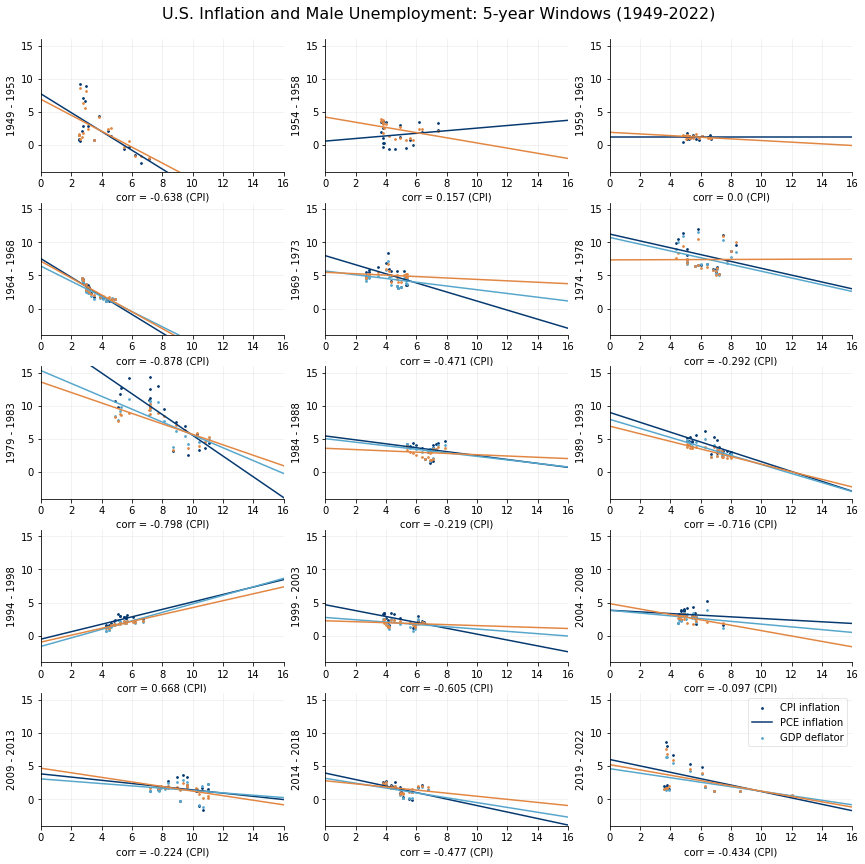

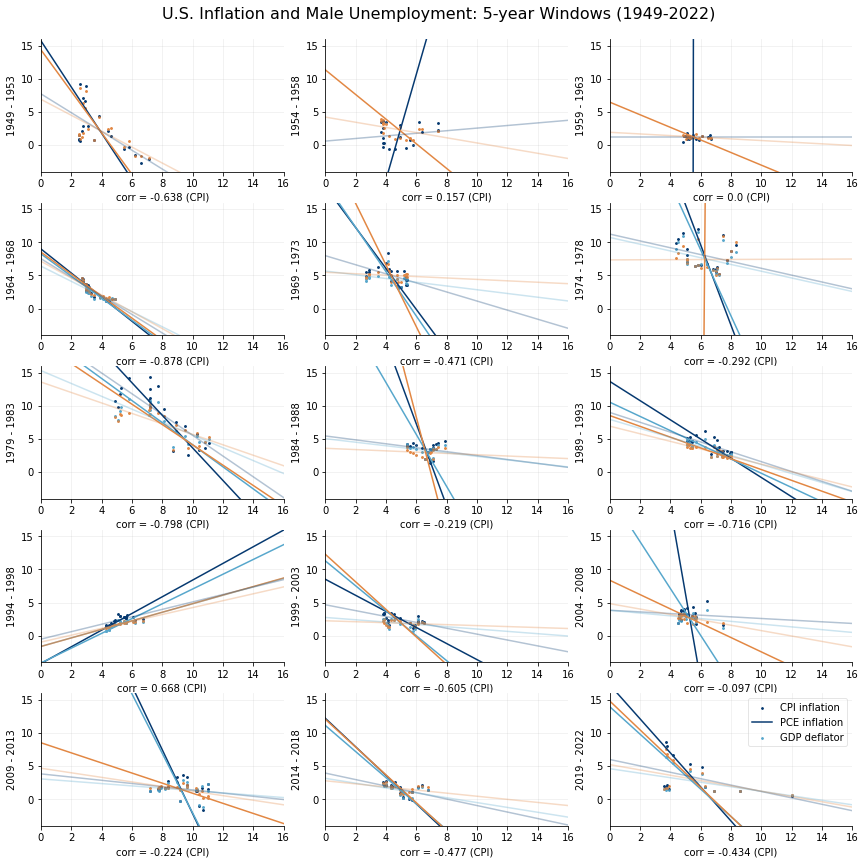

In [19]:
# plot rolling windows
inflations = ['CPI_Q_inflation', 'PCE_Q_inflation', 'GDP_deflator_Q_inflation']
unemployment = 'unemp_rate_M_Q'

title = "U.S. Inflation and Male Unemployment: 5-year Windows (1949-2022)"
legend = ['CPI inflation', 'PCE inflation', 'GDP deflator']

# both directions
plot_rol_windows(rol_windows, quarterly_data, inflations, unemployment ,title, legend, xy=1)
plot_rol_windows(rol_windows, quarterly_data, inflations, unemployment ,title, legend, xy='both')

As we can clearly observe from the above regression plots, there is in general a negative Phillips relationship in the short-run, but from time to time it could even transits into a significantly positive one. This empirical observation echoes Milton Friedman’s 1976 Nobel lecture, in which he proposed a possibly positive Phillips relationship and postulated that the positive slope between inflation and unemployment over long periods may occur as a transitional phenomenon that will disappear as economic agents adjust not only their expectations but their institutional and political arrangements.

Next, I select wider rolling windows to perform regression on, and report outcomes in the same plot to draw comparisons. I regress inflation rate on male unemployment over 15-year windows from 1949 to 2022. It seems fluctuations in inflation rates died down over the last few decades, while fluctuations in unemployment still as often occur (particularly following the 2008 crisis). 


In spirit of a NAIRU model, the right panel plots 4-quarter change in U.S. inflation (to very crudely represent unexpected inflation) and unemployment gap from 1980 onward, where the unemployment gap is calculated by subtracting from the unemployment rate the natural rate of unemployment reported by Congress Budget Office (CBO). I use only 1980 onward data because the gender gap in unemployment rate appears to diminish greatly since 1980 in the U.S., making the comparison more meaningful.

/Users/tom/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/tom/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/tom/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/tom/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/tom/anaconda3/lib/python3.7/site-packages/statsmodels/tsa

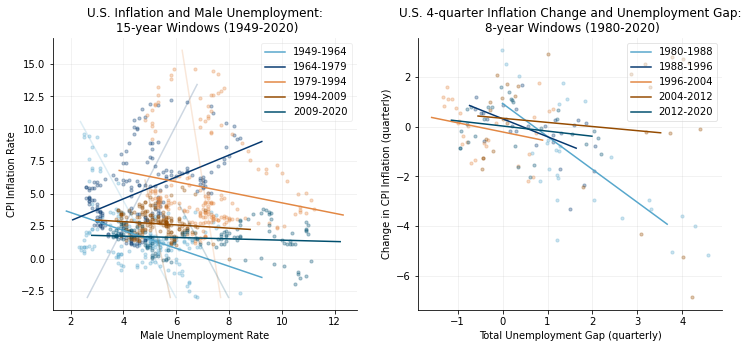

In [20]:
rol_windows = create_windows("1948-12-31", "2019-12-01", cumulative=0, freq=15)

fig, ax = plt.subplots(1,2, figsize=(12,5))
colors2 = ['#57a7cc', '#063970', '#e28743', '#954B00', '#004F6E']
for i, win in enumerate(rol_windows):
    infl, unemp = get_sample(monthly_data, 'CPI_inflation', 'unemp_rate_M', win[0], win[1])    
    res, _ = Phillips_OLS(infl, unemp, xy=1)
    coef = res.fit().params
    # opposite
    res2, _ = Phillips_OLS(infl, unemp, xy=0)
    coef2 = res2.fit().params

    ax[0].scatter(unemp, infl, s=10, c=colors2[i], alpha=0.3, marker='o')
    # reg line
    x = np.linspace(min(unemp) * 0.8, max(unemp) * 1.1, 500)                 # unemp
    y = coef[0] + coef[1] * x                                                 # infl
    ax[0].plot(x,y, c=colors2[i], label=str(win[0].year+1) + '-' + str(win[1].year+1))

    # opposite reg line
    y = np.linspace(-3, max(infl) * 1.1, 500)                 # unemp
    x = coef2[0] + coef2[1] * y                                                # infl
    ax[0].plot(x,y, c=colors2[i], alpha=0.2)

    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].grid(alpha=0.2)
ax[0].legend(framealpha=0.3)
ax[0].set_xlabel('Male Unemployment Rate')
ax[0].set_ylabel('CPI Inflation Rate')
ax[0].set_title("U.S. Inflation and Male Unemployment:\n 15-year Windows (1949-2020)")

rol_windows = create_windows("1979-12-31", "2019-12-01", cumulative=0, freq=8)

for i, win in enumerate(rol_windows):
    infl, unemp_gap = get_sample(quarterly_data, 'CPI_Q_inflation', 'unemp_gap_Q', win[0], win[1]) 
    infl_change = infl - infl.shift(4) 
    res = sm.OLS(endog=infl_change, exog=sm.tools.add_constant(unemp_gap), missing='drop')
    coef = res.fit().params
    ax[1].scatter(unemp_gap, infl_change, s=10, c=colors2[i], alpha=0.3, marker='o')
    # reg line
    x = np.linspace(min(unemp_gap) * 1.2, max(unemp_gap) * 0.8, 500)                 # unemp
    y = coef[0] + coef[1] * x                                              
    ax[1].plot(x,y, c=colors2[i], label=str(win[0].year+1) + '-' + str(win[1].year+1))
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].grid(alpha=0.2)
ax[1].set_xlabel('Total Unemployment Gap (quarterly)')
ax[1].set_ylabel('Change in CPI Inflation (quarterly)')
ax[1].set_title("U.S. 4-quarter Inflation Change and Unemployment Gap:\n 8-year Windows (1980-2020)")
ax[1].legend(framealpha=0.5, loc='upper right')
plt.show()


The left panel above again authenticates Friedman's story about how the Phillips curve could "drift up" and become positive with a longer time window. On the right panel with the simple NAIRU specification, the slopes become more negative, implying a more robust negative relationship. Moreover, we can observe that the Phillips Curve seem to "flatten" as time moves on, which echoes our previous observation that there has been less volatility in inflation but unemployment fluctuation remains of a similar degree as economic booms and recessions come over, indicating a smaller slope on the Phillips Curve.

### Rolling regression results
One downside of the above analysis is that the slopes are very sensitive to the choice of time windows. A slightly different inclusion of years may convey very different slope patterns. To make these observations more robust, I perform the same exercise as above but implement two rolling regressions, i.e., I move each 5-year window forward month by month and report the coefficients of regressions on both directions of fit.

- I regress monthly CPI inflation on male unemployment rate over a 5 year (60 months) window, and roll the window forward.
- I regress quarterly CPI inflation on unemployment gap over a 10 year (40 quarters) window, and roll the window forward, since 1980.

I plot the parameter on the endogenous variable (male unemployemnt rate/unemployment gap) and also add the 0.95 confidence interval.

/Users/tom/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


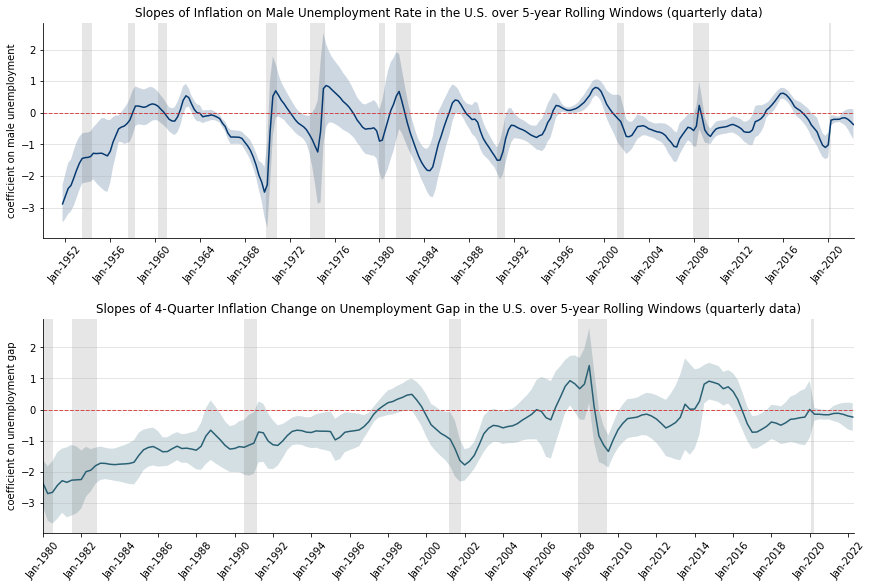

In [21]:
# perform rolling regression
res1 = RollingOLS(quarterly_data['CPI_Q_inflation'], sm.tools.add_constant(quarterly_data['unemp_rate_M_Q']), window=20)

CPI_sample, unemp_gap = get_sample(quarterly_data, 'CPI_Q_inflation', 'unemp_gap_Q', "1970-12-31", "2022-5-01")
res2 = RollingOLS(CPI_sample - CPI_sample.shift(4), sm.tools.add_constant(unemp_gap), window=20)
result1 = res1.fit()
result2 = res2.fit()

# unpack confidence interval
alpha = .05
conf_int1 = result1.conf_int(alpha=alpha)['unemp_rate_M_Q']
conf_int2 = result2.conf_int(alpha=alpha)['unemp_gap_Q']

fig, ax = plt.subplots(2,1, figsize=(12,8))
fig.tight_layout(h_pad=6, rect=[0, 0, 1, 0.96])
ax[0].plot(result1.params['unemp_rate_M_Q'], color=colors[1])
#ax[0].plot(result1.conf_int(alpha=alpha)['unemp_rate_M'])
ax[0].fill_between(result1.params.index, conf_int1['lower'], conf_int1['upper'], alpha=0.2, color=colors[1], edgecolor=None)
ax[0].axhline(y=0, color='tab:red', ls='--', lw=1, alpha=0.8)
ax[0].xaxis.set_major_locator(mdates.YearLocator(4))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax[0].tick_params(axis="x", labelrotation= 50)
ax[0].set_title('Slopes of Inflation on Male Unemployment Rate in the U.S. over 5-year Rolling Windows (quarterly data)', size='large')
ax[0].set_ylabel('coefficient on male unemployment', size='medium')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].grid(axis='y', alpha=0.4)
ax[0].set_xlim(pd.to_datetime('1950-01-01'),pd.to_datetime('2022-05-01') )
shade_recessions(ax[0])

ax[1].plot(result2.params['unemp_gap_Q'], color='#296073')
ax[1].fill_between(result2.params.index, conf_int2['lower'], conf_int2['upper'], alpha=0.2, color='#296073', edgecolor=None)
ax[1].axhline(y=0, color='tab:red', ls='--', lw=1, alpha=0.8)
ax[1].xaxis.set_major_locator(mdates.YearLocator(2))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax[1].tick_params(axis="x", labelrotation= 50)
ax[1].set_title('Slopes of 4-Quarter Inflation Change on Unemployment Gap in the U.S. over 5-year Rolling Windows (quarterly data)', size='large')
ax[1].set_ylabel('coefficient on unemployment gap', size='medium')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].grid(axis='y', alpha=0.4)
ax[1].set_xlim(pd.to_datetime('1980-01-01'),pd.to_datetime('2022-05-01') )
shade_recessions(ax[1])
plt.show()

Next, I apply the same rolling regression strategy but with reversed regression again. The first figure plots the coefficient on quarterly CPI inflation; the second figure plots the coefficient 4-quarter inflation change.

/Users/tom/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


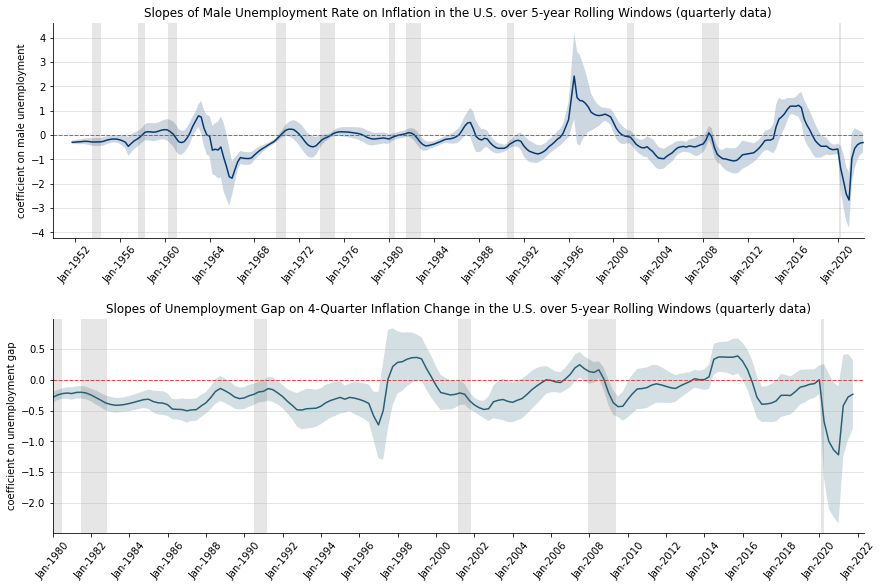

In [22]:
# perform rolling regression in the opposite direction
res3 = RollingOLS(quarterly_data['unemp_rate_M_Q'], sm.tools.add_constant(quarterly_data['CPI_Q_inflation']), window=20)

CPI_sample, unemp_gap = get_sample(quarterly_data, 'CPI_Q_inflation', 'unemp_gap_Q', "1970-12-31", "2021-12-01")
res4 = RollingOLS(unemp_gap, sm.tools.add_constant(CPI_sample - CPI_sample.shift(4)), window=20)
result3 = res3.fit()
result4 = res4.fit()

# unpack confidence interval
alpha = .05
conf_int1 = result3.conf_int(alpha=alpha)['CPI_Q_inflation']
conf_int2 = result4.conf_int(alpha=alpha)['CPI_Q_inflation']

fig, ax = plt.subplots(2,1, figsize=(12,8))
fig.tight_layout(h_pad=6, rect=[0, 0, 1, 0.96])
ax[0].plot(result3.params['CPI_Q_inflation'], color=colors[1])
#ax[0].plot(result1.conf_int(alpha=alpha)['unemp_rate_M'])
ax[0].fill_between(result3.params.index, conf_int1['lower'], conf_int1['upper'], alpha=0.2, color=colors[1], edgecolor=None)
ax[0].axhline(y=0, color='tab:red', ls='--', lw=1, alpha=0.8)
ax[0].xaxis.set_major_locator(mdates.YearLocator(4))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax[0].tick_params(axis="x", labelrotation= 50)
ax[0].set_title('Slopes of Male Unemployment Rate on Inflation in the U.S. over 5-year Rolling Windows (quarterly data)', size='large')
ax[0].set_ylabel('coefficient on male unemployment', size='medium')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].grid(axis='y', alpha=0.4)
ax[0].set_xlim(pd.to_datetime('1950-01-01'),pd.to_datetime('2022-05-01') )
shade_recessions(ax[0])

ax[1].plot(result4.params['CPI_Q_inflation'], color='#296073')
ax[1].fill_between(result4.params.index, conf_int2['lower'], conf_int2['upper'], alpha=0.2, color='#296073', edgecolor=None)
ax[1].axhline(y=0, color='tab:red', ls='--', lw=1, alpha=0.8)
ax[1].xaxis.set_major_locator(mdates.YearLocator(2))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax[1].tick_params(axis="x", labelrotation= 50)
ax[1].set_title('Slopes of Unemployment Gap on 4-Quarter Inflation Change in the U.S. over 5-year Rolling Windows (quarterly data)', size='large')
ax[1].set_ylabel('coefficient on unemployment gap', size='medium')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].grid(axis='y', alpha=0.4)
ax[1].set_xlim(pd.to_datetime('1980-01-01'),pd.to_datetime('2022-05-01') )
shade_recessions(ax[1])
plt.show()

### Test Against a Random Walk

Both directions of fit confirm the previous findings about the Phillips relationship and marks the success of Milton Friedman's shrewd and prescient observations and predictions. Moreover, these slopes/coefficients look quite like a random walk. To apply a simple test against a random walk, I plot multiple paths of AR(1) process with a unit root and white noise normally distributed with standard deviation equal to the std of the entire series, and plot them together as follows. 

Since we do not know enough of the true process, there is no easy way to perform an appropriate hypothesis testing. Still, it seems the drifting coefficients on the statistical Phillips Curve has a bit more stationarity than a random walk AR(1) process specified above, but not far from it.

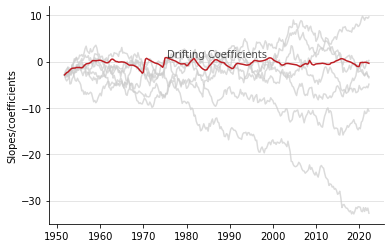

In [23]:
def sim_Randomwalk(init, std, T):
   """
   create a random walk with given initial point and std of the shocks
   """
   y = init
   y_hist = [y]
   for t in range(T):
      y = y + np.random.normal(loc=0, scale=std)
      y_hist.append(y)
   return y_hist

# parameters and sample
coefs = result1.params['unemp_rate_M_Q']
coefs = coefs[coefs.first_valid_index():]
init = coefs[0]
T = coefs.size - 1

# plot
fig, ax = plt.subplots(1,1, figsize=(6,4))
num = 7
for i in range(num):
    sample = pd.DataFrame(sim_Randomwalk(init, np.std(coefs), T), index=coefs.index)
    ax.plot(sample, color=(0.8, 0.8, 0.8), alpha=0.7)
ax.set_ylabel('Slopes/coefficients')
ax.grid(axis='y', alpha=0.4)
ax.plot(coefs, color = '#BD1E24')
ax.text(1990, 1, "Drifting Coefficients", alpha=0.7)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.show()

### Explanations of Disinflation Mechanism

Our primary purpose is to examine how the short-run and long-run Phillips curve hold over time using linear regressions with both directions of fit. Another way to understand the above results, however, is to see them as the government or monetary authority's estimation process of the statistical unemployment-inflation relationship, from where they solve the "Phelps Problem" and set optimal inflation rate. 

In that model, the public forms expectations not following a simple one-period adaptive scheme but by geometrically summing over inflation lags, and the government solves a discounted infinite horizon quadratic control problem. Sargent 1999 proposes that under a <u>constant gain assumption</u> in the learning mechanism and assuming the true data-generating process follows the natural rate framework, solving the Phelps problem can lead the governments to uncover the "natural rate theory" in the sense that it leads them to pursue lower inflation target without explicitly knowing the data-generating process. He simulated and estimated under both the Classical and Keynesian identification schemes - the latter delivers better fit in the data.

## Extension: the same exercise with UK data
For UK data, I use three commonly used price indices: Consumer Price Index (CPI), Consumer Price Index with Housing (CPIH), and Retail Price Index (RPI). Because API for UK's Office for National Statistics is still in Beta mode, I access the data by directly downloading from online.
- `CPIH ANNUAL RATE 00: ALL ITEMS 2015=100`
-  `CPI ANNUAL RATE 00: ALL ITEMS 2015=100`
- `RPI All Items: Percentage change over 12 months: Jan 1987=100`

For unemployment data, I accessed the overall and male-only monthly and quarterly rate as before.

### Data cleaning
The UK data is again organized into two subsets: monthly data and quarterly data. Due to narrower range of availability on the various inflation data, I shall truncate the dataset to start from 1968. The earlist date with both unemployment and inflation data available in the officially reported ONS dataset is in 1972.

In [24]:
UK_list = ['CPI_inflation_UK', 'CPIH_inflation_UK', 'RPI_inflation_UK', 'unemp_UK', 'unemp_male_UK']
UK_data = pd.DataFrame({})

# merge and parse
for idx, item in enumerate(UK_list):
    if idx == 0:
        UK_data = UK_data.join(pd.read_csv(item + '.csv').drop(index=list(range(7))), how='outer')
    else:
        UK_data = UK_data.merge(pd.read_csv(item + '.csv').drop(index=list(range(7))), how='outer')
UK_data = UK_data.set_index('Title')

# rename
old_names = list(UK_data.columns)
new_names = [item.replace('_UK', '') for item in UK_list]
name_dict = dict(zip(old_names, new_names))
UK_data = UK_data.rename(columns=name_dict)

# get monthly and quarterly data
UK_monthly_data = UK_data[UK_data.index.str.len() == 8]
UK_quarterly_data = UK_data[UK_data.index.str.contains('Q')]
UK_monthly_data.index = pd.to_datetime(UK_monthly_data.index)
UK_quarterly_data.index = pd.to_datetime(UK_quarterly_data.index.str.replace(' ',''))

UK_monthly_data.index.names = ['date']
UK_quarterly_data.index.names = ['date']
UK_monthly_data = UK_monthly_data.sort_index().apply(pd.to_numeric)
UK_quarterly_data = UK_quarterly_data.sort_index().apply(pd.to_numeric)

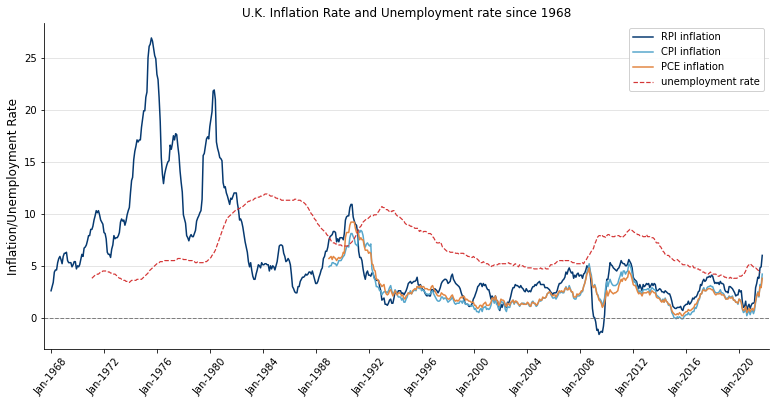

In [25]:
UK_monthly_data = UK_monthly_data.loc[UK_monthly_data.index >= '1968-1-1']
UK_quarterly_data = UK_quarterly_data.loc[UK_quarterly_data.index >= '1968-1-1']

# inflation and unemployment
fig, ax = plt.subplots(figsize=(13, 6))

ax.margins(x=0.01)
ax.plot(UK_monthly_data['RPI_inflation'], color = colors[1], lw=1.5)
ax.plot(UK_monthly_data['CPI_inflation'], color = colors[0], lw=1.5)
ax.plot(UK_monthly_data['CPIH_inflation'], color = colors[2], lw=1.5)
ax.plot(UK_monthly_data['unemp'], color = colors[3], alpha=0.95, lw=1.2,  ls='--')

ax.axhline(y=0, color='tab:gray', linestyle='--', lw=1)
ax.legend(['RPI inflation', 'CPI inflation', 'PCE inflation', 'unemployment rate'], 
    loc='upper right', frameon=True, framealpha=0.9, fontsize='medium')

ax.set_title('U.K. Inflation Rate and Unemployment rate since 1968', size='large')
ax.set_ylabel('Inflation/Unemployment Rate', size='large')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.4)

ax.xaxis.set_major_locator(mdates.YearLocator(4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.tick_params(axis="x", labelrotation= 50)

plt.show()

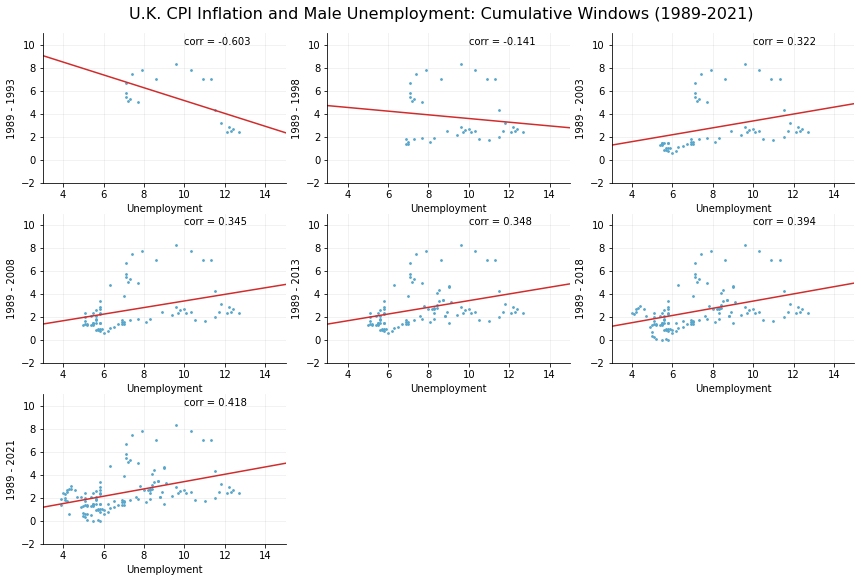

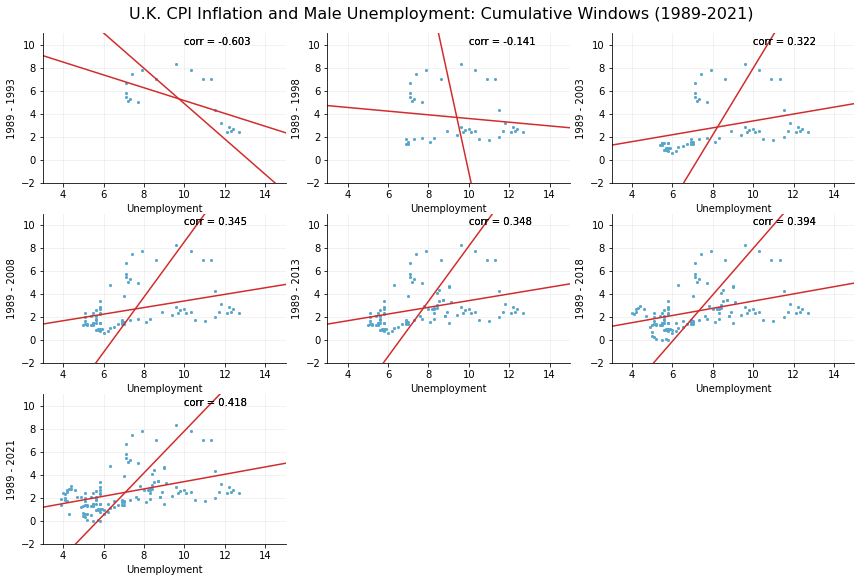

In [26]:
cum_windows = create_windows("1988-12-31", "2021-11-01", cumulative=1, freq=5)
rol_windows = create_windows("1971-12-31", "2021-11-01", cumulative=0, freq=5)


# cumulative window plot
title = "U.K. CPI Inflation and Male Unemployment: Cumulative Windows (1989-2021)"
plot_cum_windows(cum_windows, UK_quarterly_data, 'CPI_inflation', 'unemp_male', title, xy=1, xlim=[3,15], ylim=[-2,11], figsize=[12,8])
plot_cum_windows(cum_windows, UK_quarterly_data, 'CPI_inflation', 'unemp_male', title, xy='both', xlim=[3,15], ylim=[-2,11], figsize=[12,8])


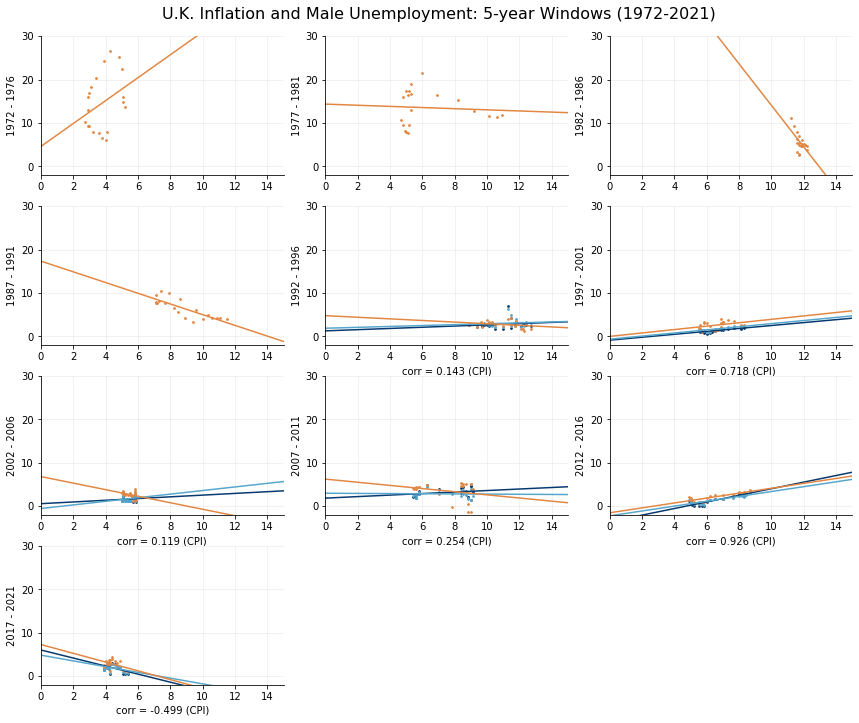

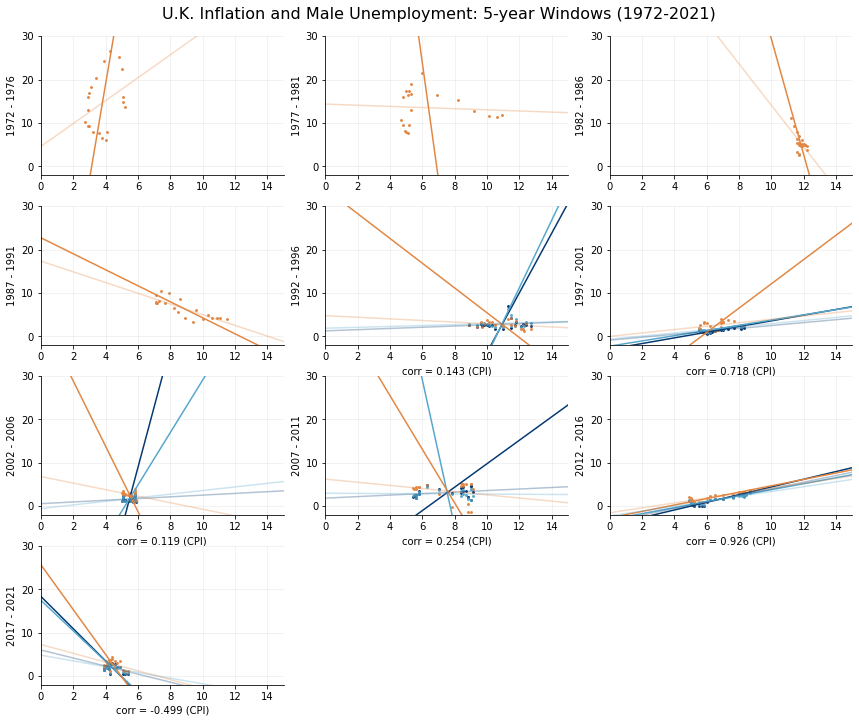

In [27]:
# rolling window plot
inflations = ['CPI_inflation', 'CPIH_inflation', 'RPI_inflation']
title = "U.K. Inflation and Male Unemployment: 5-year Windows (1972-2021)"
legend = ['CPI inflation', 'CPIH inflation', 'RPI inflation']
plot_rol_windows(rol_windows, UK_quarterly_data, inflations, 'unemp_male', title, legend, xy=1,xlim=[0,15], ylim=[-2,30], figsize=[12,10])
plot_rol_windows(rol_windows, UK_quarterly_data, inflations, 'unemp_male', title, legend, xy='both',xlim=[0,15], ylim=[-2,30], figsize=[12,10])

/Users/tom/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


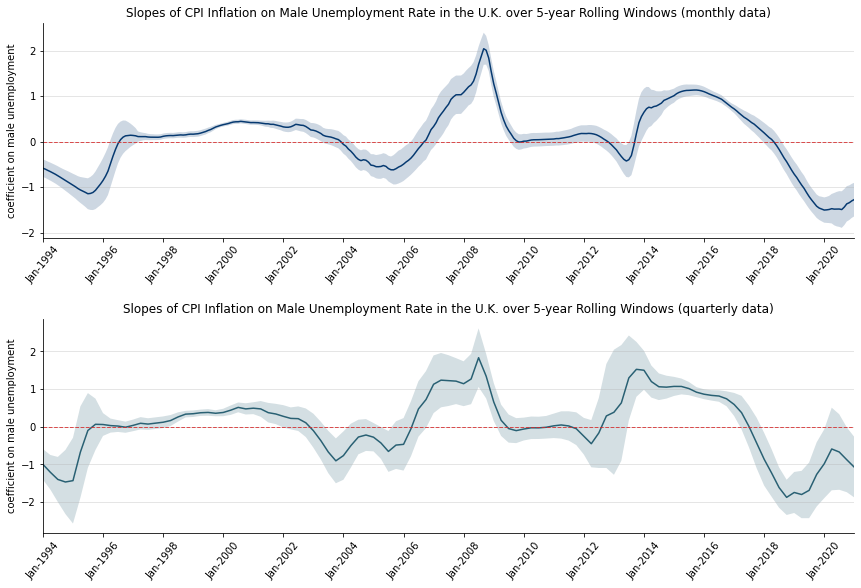

In [28]:
# perform rolling regression
CPI_sample1, unemp1 = get_sample(UK_monthly_data, 'CPI_inflation', 'unemp_male', "1988-12-31", "2021-5-01")
CPI_sample2, unemp2 = get_sample(UK_quarterly_data, 'CPI_inflation', 'unemp_male', "1988-12-31", "2021-5-01")

res1 = RollingOLS(CPI_sample1, sm.tools.add_constant(unemp1), window=60)
res2 = RollingOLS(CPI_sample2, sm.tools.add_constant(unemp2), window=16)
result1 = res1.fit()
result2 = res2.fit()

# unpack confidence interval
alpha = .05
conf_int1 = result1.conf_int(alpha=alpha)['unemp_male']
conf_int2 = result2.conf_int(alpha=alpha)['unemp_male']

fig, ax = plt.subplots(2,1, figsize=(12,8))
fig.tight_layout(h_pad=6, rect=[0, 0, 1, 0.96])
ax[0].plot(result1.params['unemp_male'], color=colors[1])
ax[0].fill_between(result1.params.index, conf_int1['lower'], conf_int1['upper'], alpha=0.2, color=colors[1], edgecolor=None)
ax[0].axhline(y=0, color='tab:red', ls='--', lw=1, alpha=0.8)
ax[0].xaxis.set_major_locator(mdates.YearLocator(2))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax[0].tick_params(axis="x", labelrotation= 50)
ax[0].set_title('Slopes of CPI Inflation on Male Unemployment Rate in the U.K. over 5-year Rolling Windows (monthly data)', size='large')
ax[0].set_ylabel('coefficient on male unemployment', size='medium')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].grid(axis='y', alpha=0.4)
ax[0].set_xlim(pd.to_datetime('1994-01-01'),pd.to_datetime('2021-01-01') )

ax[1].plot(result2.params['unemp_male'], color='#296073')
ax[1].fill_between(result2.params.index, conf_int2['lower'], conf_int2['upper'], alpha=0.2, color='#296073', edgecolor=None)
ax[1].axhline(y=0, color='tab:red', ls='--', lw=1, alpha=0.8)
ax[1].xaxis.set_major_locator(mdates.YearLocator(2))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax[1].tick_params(axis="x", labelrotation= 50)
ax[1].set_title('Slopes of CPI Inflation on Male Unemployment Rate in the U.K. over 5-year Rolling Windows (quarterly data)', size='large')
ax[1].set_ylabel('coefficient on male unemployment', size='medium')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].grid(axis='y', alpha=0.4)
ax[1].set_xlim(pd.to_datetime('1994-01-01'),pd.to_datetime('2021-01-01') )
plt.show()

/Users/tom/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


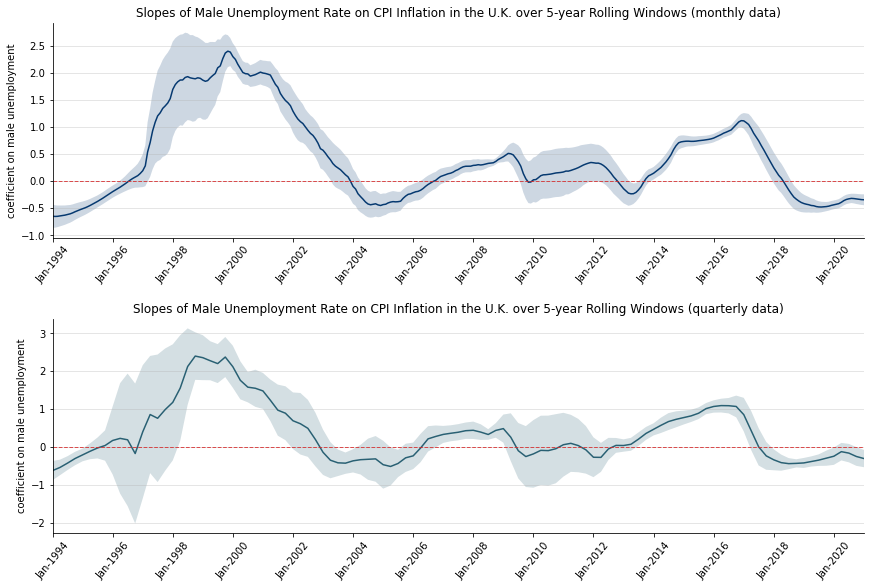

In [29]:
# perform rolling regression
CPI_sample1, unemp1 = get_sample(UK_monthly_data, 'CPI_inflation', 'unemp_male', "1988-12-31", "2021-5-01")
CPI_sample2, unemp2 = get_sample(UK_quarterly_data, 'CPI_inflation', 'unemp_male', "1988-12-31", "2021-5-01")

res1 = RollingOLS(unemp1, sm.tools.add_constant(CPI_sample1), window=60)
res2 = RollingOLS(unemp2, sm.tools.add_constant(CPI_sample2), window=16)
result1 = res1.fit()
result2 = res2.fit()

# unpack confidence interval
alpha = .05
conf_int1 = result1.conf_int(alpha=alpha)['CPI_inflation']
conf_int2 = result2.conf_int(alpha=alpha)['CPI_inflation']

fig, ax = plt.subplots(2,1, figsize=(12,8))
fig.tight_layout(h_pad=6, rect=[0, 0, 1, 0.96])
ax[0].plot(result1.params['CPI_inflation'], color=colors[1])
ax[0].fill_between(result1.params.index, conf_int1['lower'], conf_int1['upper'], alpha=0.2, color=colors[1], edgecolor=None)
ax[0].axhline(y=0, color='tab:red', ls='--', lw=1, alpha=0.8)
ax[0].xaxis.set_major_locator(mdates.YearLocator(2))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax[0].tick_params(axis="x", labelrotation= 50)
ax[0].set_title('Slopes of Male Unemployment Rate on CPI Inflation in the U.K. over 5-year Rolling Windows (monthly data)', size='large')
ax[0].set_ylabel('coefficient on male unemployment', size='medium')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].grid(axis='y', alpha=0.4)
ax[0].set_xlim(pd.to_datetime('1994-01-01'),pd.to_datetime('2021-01-01') )

ax[1].plot(result2.params['CPI_inflation'], color='#296073')
ax[1].fill_between(result2.params.index, conf_int2['lower'], conf_int2['upper'], alpha=0.2, color='#296073', edgecolor=None)
ax[1].axhline(y=0, color='tab:red', ls='--', lw=1, alpha=0.8)
ax[1].xaxis.set_major_locator(mdates.YearLocator(2))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax[1].tick_params(axis="x", labelrotation= 50)
ax[1].set_title('Slopes of Male Unemployment Rate on CPI Inflation in the U.K. over 5-year Rolling Windows (quarterly data)', size='large')
ax[1].set_ylabel('coefficient on male unemployment', size='medium')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].grid(axis='y', alpha=0.4)
ax[1].set_xlim(pd.to_datetime('1994-01-01'),pd.to_datetime('2021-01-01') )
plt.show()

It seems the inverse relationship between unemployment and inflation is less obvious for the U.K. data from this crude analysis, but it could also be due to greater limitations on U.K. data availability.

## References

Milton Friedman – Prize Lecture. NobelPrize.org. Nobel Prize Outreach AB 2021. Thu. 23 Dec 2021. <https://www.nobelprize.org/prizes/economic-sciences/1976/friedman/lecture/>

Friedman, Milton. “The Role of Monetary Policy.” The American Economic Review, vol. 58, no. 1, American Economic Association, 1968, pp. 1–17.

King, Robert G., and Mark W. Watson. “The Post-War U.S. Phillips Curve: A Revisionist Econometric History.” Carnegie-Rochester Conference Series on Public Policy 41 (December 1994): 157–219.

Kydland, Finn E., and Edward C. Prescott. “Rules Rather than Discretion: The Inconsistency of Optimal Plans.” Journal of Political Economy 85, no. 3 (June 1977): 473–91.

Sargent, Thomas J. The Conquest of American Inflation. Princeton, N.J: Princeton University Press, 1999. Print.
